In [1]:
using BifurcationKit, LinearAlgebra, Plots, SparseArrays, Parameters, Setfield
const BK = BifurcationKit
using LaTeXStrings
using Interpolations
include("Additional_Function_Migration_model.jl")

Main.Extra_Migration

In [2]:
N=100
function Fun_travelling_wave(X,p)
    @unpack W=p
    U=X[end-1]
    M=X[end]
    residual=similar(X)
    Extra_Migration.FH(residual,X[1:end-2],W,U,M,p,N)
    return residual
end
par_mod=(E = 0.51, K = 4.5, A = 0.05, Lsd = 0.12, U = 0.05, W = 2.0, M = 2.0, θ = 1.0,S=Extra_Migration.DS, γ = 9.6, mu0 = 0.3, expDC = log10(9.6), filename="initial_cond.txt")

(E = 0.51, K = 4.5, A = 0.05, Lsd = 0.12, U = 0.05, W = 2.0, M = 2.0, θ = 1.0, S = Main.Extra_Migration.DS, γ = 9.6, mu0 = 0.3, expDC = 0.9822712330395684, filename = "initial_cond.txt")

In [3]:
sol0=Extra_Migration.initial_cond(N,par_mod,false);

No initial condition available. Default given


In [4]:
list_A_values=[1.,2.,3.5,5.,7.0]
sol_dic=Dict();

In [5]:
for A in 0.1:0.1:list_A_values[end]
    par_mod=@set par_mod.A=A
    opt_newton = NewtonPar(tol = 1e-9, verbose =false,maxIter=50)
    prob = BifurcationProblem(Fun_travelling_wave,sol0,par_mod,(@lens _.W),recordFromSolution= (x, p) -> x[end];)
    out=  newton(prob, opt_newton);
    sol0=out.u
    if A in list_A_values
        print("Computing bifurcation diagram for A = "*string(A)*"\n")
        prob = BifurcationProblem(Fun_travelling_wave,sol0,par_mod,(@lens _.W),recordFromSolution= (x, p) -> x[end];)

        opt_newton = NewtonPar(tol = 1e-8, verbose =false, maxIter = 2)
        opts_br = ContinuationPar(dsmin=0.0005,dsmax=0.4,ds=0.01, pMin=0.01,pMax=8.,detectBifurcation=0,
               newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=2000)
        branch=BK.continuation(prob,PALC(),opts_br;plot=false,bothside=true);
        sol_dic[A]=branch
    end
end

Computing bifurcation diagram for A = 1.0
Computing bifurcation diagram for A = 2.0
Computing bifurcation diagram for A = 3.5
Computing bifurcation diagram for A = 5.0
Computing bifurcation diagram for A = 7.0


In [44]:
# save bifurcation diagram and corresponding solution in the directory indicated
# for each value of A a subfolder is created

namedir="bifurcation_diagram/"
Extra_Migration.save_solution(namedir,sol_dic,N,par_mod)

Folder already exists
Folder already exists
Folder already exists
Folder already exists


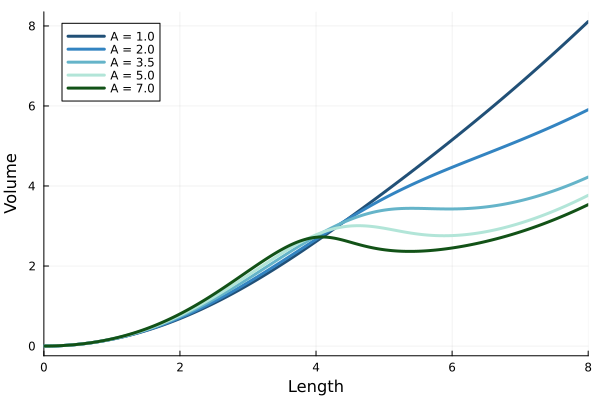

In [72]:
default(palette = palette(:bukavu10))
plot()
for A in list_A_values
    plot!(sol_dic[A],label="A = "*string(A),lw=3.)
end
display(plot!(xlabel="Length",ylabel="Volume",xlim=(0,8)))